# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [1]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
plt.ioff()

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [3]:
data = pd.read_csv('~/mipt-stats/titanic/train.csv', index_col=0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [4]:
# Размеры датасетов
size = len(data)
train_size = int(size * 0.7)
test_size = size - train_size

# Случайная выборка обучающих данных
test_data = data.tail(test_size)
train_data = data.head(train_size)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [5]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак


def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [6]:
train_data, train_target = get_features_and_target(train_data)
test_data, test_target = get_features_and_target(test_data)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

Разобьём данные на 2 сета: те кто выжили, и те кто умерли:

In [7]:
survived = train_data[train_target == 1]
died = train_data[train_target == 0]

Построим столбчатую диаграмму количества выживших мужчин и женщин

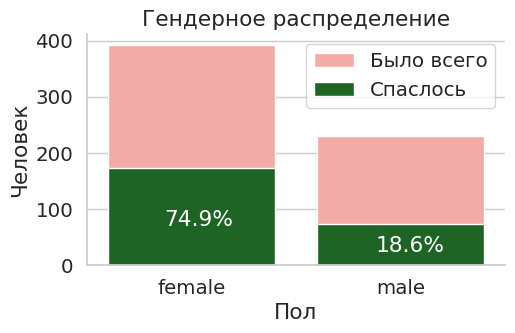

In [42]:
f, ax = plt.subplots(figsize=(5.4, 3))

# Общее число пассажиров
sns.set_color_codes("pastel")
p = sns.countplot(train_data, x='Sex', color='r', label='Было всего')

# Выжившие пассажиры
sns.set_color_codes("dark")
sns.countplot(survived, x='Sex', color='g', label='Спаслось')
female_surv_rate = len(survived[survived.Sex == 'female']) / len(
    train_data[train_data.Sex == 'female'])
male_surv_rate = len(survived[survived.Sex == 'male']) / len(
    train_data[train_data.Sex == 'male'])

# Добавление данных на график
ax.text(-0.13, 70, f"{female_surv_rate * 100:.1f}%", color='white')
ax.text(0.88, 24, f"{male_surv_rate * 100:.1f}%", color='white')
ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(ylabel='Человек', xlabel='Пол', title='Гендерное распределение')
sns.despine(top=True)
plt.show()

Построим диаграмму числа выживших пассажиров с отличающимися билетами

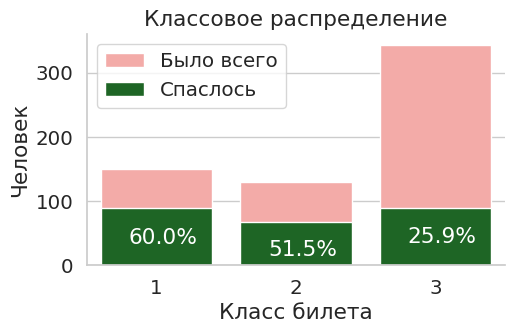

In [43]:
g, mx = plt.subplots(figsize=(5.4, 3))

sns.set_color_codes("pastel")
sns.countplot(train_data, x='Pclass', color='r', label='Было всего')

sns.set_color_codes("dark")
sns.countplot(survived, x='Pclass', color='g', label='Спаслось')
first_surv_rate = len(survived[survived.Pclass == 1]) / len(
    train_data[train_data.Pclass == 1])
second_surv_rate = len(survived[survived.Pclass == 2]) / len(
    train_data[train_data.Pclass == 2])
third_surv_rate = len(survived[survived.Pclass == 3]) / len(
    train_data[train_data.Pclass == 3])
mx.text(-0.2, 34, f"{first_surv_rate * 100:.1f}%", color='white')
mx.text(0.8, 15, f"{second_surv_rate * 100:.1f}%", color='white')
mx.text(1.8, 35, f"{third_surv_rate * 100:.1f}%", color='white')
mx.legend(ncol=1, loc="upper left", frameon=True)
mx.set(ylabel='Человек',
       xlabel='Класс билета',
       title='Классовое распределение')
sns.despine(top=True)
plt.show()

Посмотрим теперь на величину SibSp - количество братьев сестёр и жён мужей

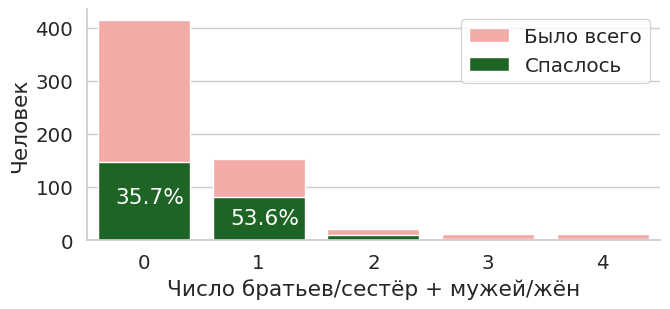

In [38]:
r, qx = plt.subplots(figsize=(7.4, 3))

sns.set_color_codes("pastel")
sns.countplot(train_data, x='SibSp', color='r', label='Было всего')

sns.set_color_codes("dark")
sns.countplot(survived, x='SibSp', color='g', label='Спаслось')
zero_surv_rate = len(survived[survived.SibSp == 0]) / len(
    train_data[train_data.SibSp == 0])
one_surv_rate = len(survived[survived.SibSp == 1]) / len(
    train_data[train_data.SibSp == 1])

# Добавление данных на график
qx.text(-0.25, 70, f"{zero_surv_rate * 100:.1f}%", color='white')
qx.text(0.75, 30, f"{one_surv_rate * 100:.1f}%", color='white')
qx.legend(ncol=1, loc="upper right", frameon=True)
qx.set(ylabel='Человек', xlabel='Число братьев/сестёр + мужей/жён')
sns.despine(top=True)
plt.show()

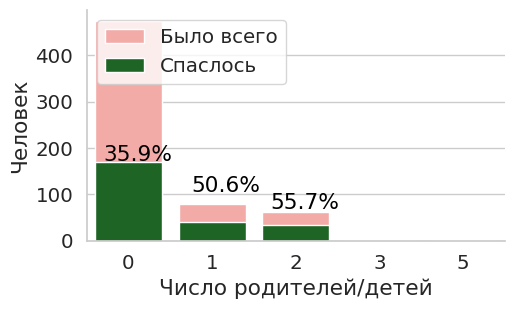

In [46]:
w, wx = plt.subplots(figsize=(5.4, 3))

sns.set_color_codes("pastel")
sns.countplot(train_data, x='Parch', color='r', label='Было всего')

sns.set_color_codes("dark")
sns.countplot(survived, x='Parch', color='g', label='Спаслось')
zero_surv_rate = len(survived[survived.Parch == 0]) / len(
    train_data[train_data.Parch == 0])
one_surv_rate = len(survived[survived.Parch == 1]) / len(
    train_data[train_data.Parch == 1])
two_surv_rate = len(survived[survived.Parch == 2]) / len(
    train_data[train_data.Parch == 2])

# Добавление данных на график
wx.text(-0.3, 173, f"{zero_surv_rate * 100:.1f}%", color='black')
wx.text(0.75, 105, f"{one_surv_rate * 100:.1f}%", color='black')
wx.text(1.7, 70, f"{two_surv_rate * 100:.1f}%", color='black')
wx.legend(ncol=1, loc="upper left", frameon=True)
wx.set(ylabel='Человек', xlabel='Число родителей/детей')
sns.despine(top=True)
plt.show()

Из последних двух графиков видно, что те кто был не один, имели более высокий шанс на спасение.
Посмотрим теперь на зависимость от возраста. Построим гистограмму

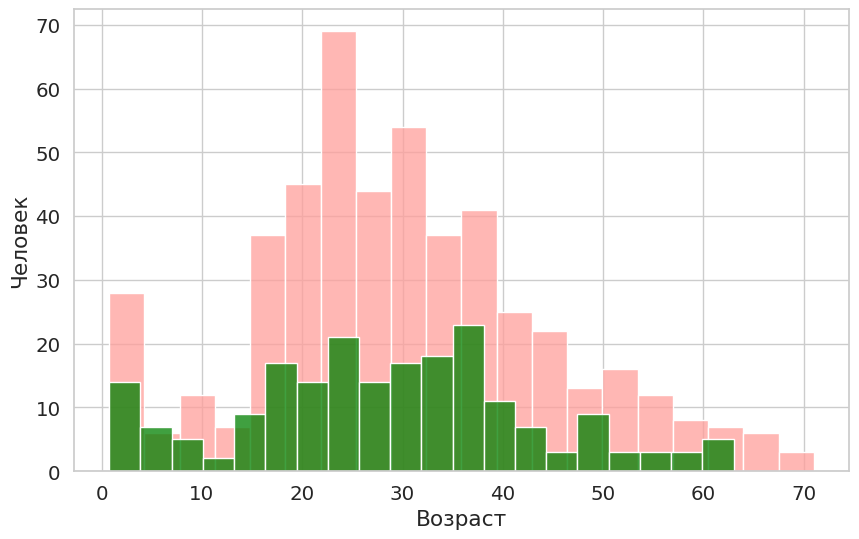

In [20]:
p, px = plt.subplots(figsize=(10, 6))

sns.set_color_codes("pastel")
px = sns.histplot(train_data, x='Age', bins=20, color='r', label='Было всего')

sns.set_color_codes("dark")
p = sns.histplot(survived, x='Age', bins=20, color='green', label='Спаслось')
px.set(ylabel='Человек', xlabel='Возраст')
qx.legend(ncol=1, loc="upper right", frameon=True)
plt.show()

Можно заметить, что дети почти все дети возраста 5-ти лет спаслись.

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [21]:
#test_data = data.drop(train_data[0])  # Оставшиеся данные - тестовые


def knn(features, train_features, train_target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''
    predicted = features.iloc[:, 1] * 0
    for i in range(len(features)):
        row = features.iloc[i]
        rho = np.sum(np.square(train_features - row), axis=1)

        train_features = train_features.assign(dist=rho)
        train_features = train_features.assign(surv=train_target)
        train_features = train_features.sort_values(by='dist')

        sumk = train_features.cumsum(axis=0)['surv'].iloc[k - 1]
        ans = 0
        if sumk > (k // 2):
            ans = 1
        else:
            ans = 0
        predicted.iloc[i] = ans
    return predicted

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`. 

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

Посмотрим на зависимость исхода от двух параметров: Age и Fare. Для метода knn будем использовать евклидову метрику, для этого необходимо отнормировать параметры Age и Fare, чтобы они вносили примерно равный вклад в расстояние. <br>
Евклидова метрика является хорошим выбором, потому что при хорошей нормировке, т.е. таких весах, что вклад одного признака равен вкладу другого признака, не имеет значение, как именно ориентрирован вектор разности двух точек метрического пространства.

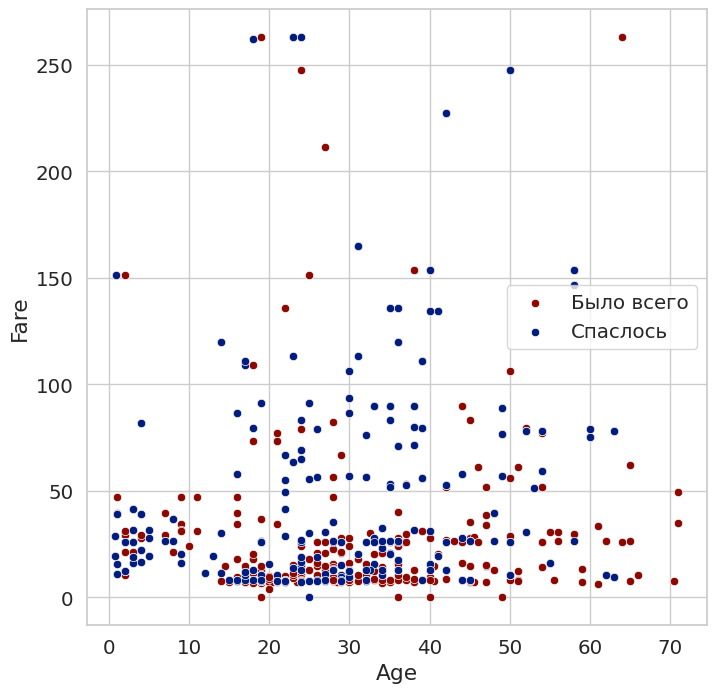

In [22]:
vt, vtx = plt.subplots(figsize=(8, 8))

sns.set_color_codes("dark")
sns.scatterplot(data=train_data[train_data.Fare < 300],
                x="Age",
                y="Fare",
                color='r',
                label='Было всего')
sns.scatterplot(data=survived[survived.Fare < 300],
                x="Age",
                y="Fare",
                color='b',
                label='Спаслось')
qx.legend(ncol=1, loc="upper right", frameon=True)
plt.show()

Отнормируем признаки, умножив возраст на 3, тем самым мы сравняем максимальные значени Age и Fare

In [23]:
def classificator(features, k=5):
    modf = train_data.copy()
    htt = features.copy()
    htt.Age *= 3.5
    modf.Age *= 3.5
    ggh = train_target.copy()
    ans = knn(htt[['Age', 'Fare']], modf[['Age', 'Fare']], ggh, k)
    return ans

Посмотрим теперь как разбивается 2-х-параметрическая плоскость на 2 множества, которые характеризуются ближайшим соседом

Для к = 1:

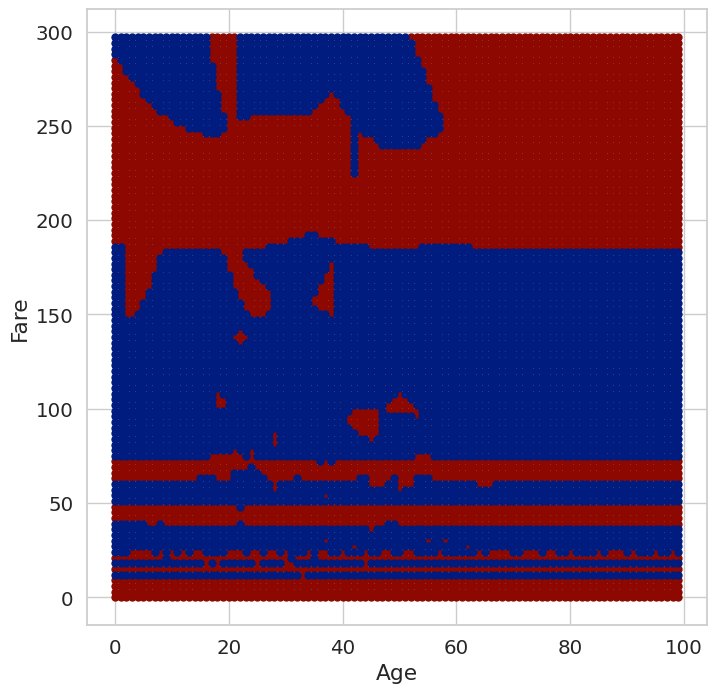

In [44]:
df = pd.DataFrame({
    'Age': pd.Series(range(10000)),
    'Fare': pd.Series(range(10000))
})
for i in range(100):
    for j in range(100):
        df.iloc[i * 100 + j].Age = i
        df.iloc[i * 100 + j].Fare = j * 3

ttt = classificator(df, 1)
df = df.assign(color=ttt)

et, etx = plt.subplots(figsize=(8, 8))

sns.set_color_codes("dark")
sns.scatterplot(data=df[df.color == 0],
                x="Age",
                y="Fare",
                color='r',
                linewidth=0)
sns.scatterplot(data=df[df.color == 1],
                x="Age",
                y="Fare",
                color='b',
                linewidth=0)

plt.show()

К = 9:

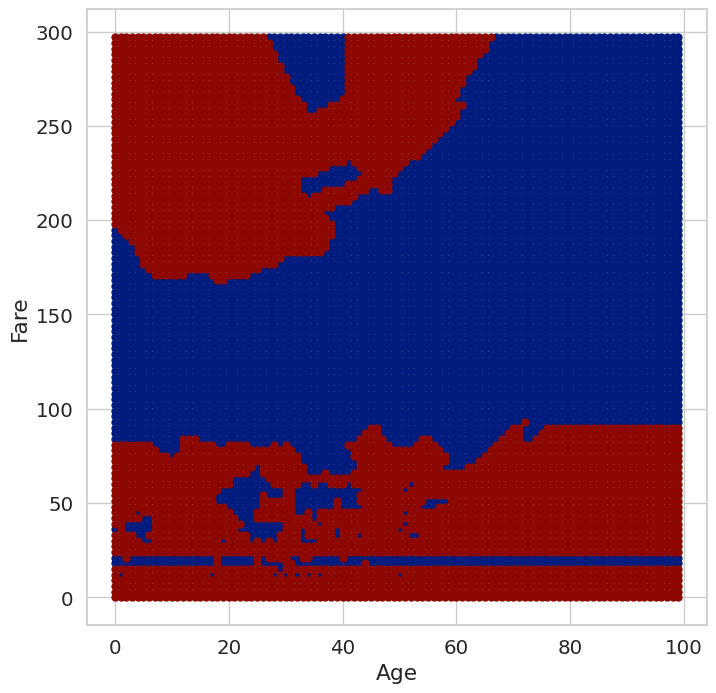

In [45]:
df = pd.DataFrame({
    'Age': pd.Series(range(10000)),
    'Fare': pd.Series(range(10000))
})
for i in range(100):
    for j in range(100):
        df.iloc[i * 100 + j].Age = i
        df.iloc[i * 100 + j].Fare = j * 3

ttt = classificator(df, 9)
df = df.assign(color=ttt)

et, etx = plt.subplots(figsize=(8, 8))

sns.set_color_codes("dark")
sns.scatterplot(data=df[df.color == 1],
                x="Age",
                y="Fare",
                color='b',
                linewidth=0)
sns.scatterplot(data=df[df.color == 0],
                x="Age",
                y="Fare",
                color='r',
                linewidth=0)
plt.show()

К=15:

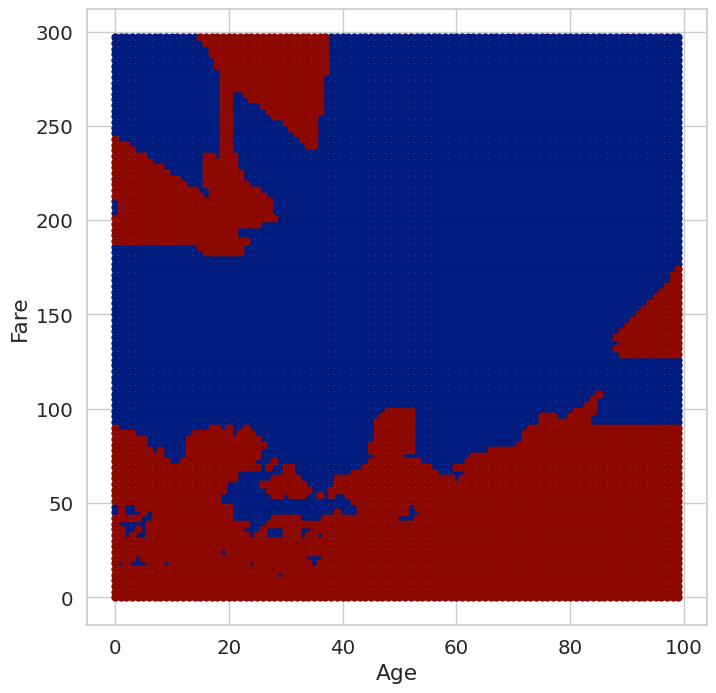

In [26]:
df = pd.DataFrame({
    'Age': pd.Series(range(10000)),
    'Fare': pd.Series(range(10000))
})
for i in range(100):
    for j in range(100):
        df.iloc[i * 100 + j].Age = i
        df.iloc[i * 100 + j].Fare = j * 3

ttt = classificator(df, 15)
df = df.assign(color=ttt)

et, etx = plt.subplots(figsize=(8, 8))

sns.set_color_codes("dark")
sns.scatterplot(data=df[df.color == 1],
                x="Age",
                y="Fare",
                color='b',
                linewidth=0)
sns.scatterplot(data=df[df.color == 0],
                x="Age",
                y="Fare",
                color='r',
                linewidth=0)
plt.show()

Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

Видно что становиться меньше "островков", т.е. размеры областей связности увеличиваются

Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы? 

Первое что можно сделать, это рассмотреть другие плоскости, т.е. взять в качестве осей другие признаки. Также можно рассмотреть многомерные метрические пространства. С многомерными пространствами могут возникнуть проблемы при нормировке, т.к. необходимо чтобы все признаки были нормированы в соответствии своему вкладу, а не значению.
Однако **главная** беда заключается в характере признаков в данной конкретной задаче. Age и Fare единственные вещественные признаки, остальные признаки отражают категории(как пол), или вообще не влияют на исход(как имя, которое мы даже не рассматривали в качестве признака). Мы также хотим чтобы над элементами множества можно было проводить некоторые оперции, например сравнивать и складывать.
Строить классификатор с другими признаками при этом не нужно.

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

Для начала спросим какого пола был пассажир, если это мужчина, спросим его класс, если это 2 или 3 класс, тог говорим что выживет только ребёнок. Или если Fare > 100 (Из графика Age - Fare). Если это женщина, то то судя по графику мало кто выжил, из тех кому больше 60, поэтому говорим что пассажир умрёт если больеш 60 или она 3-го класса.

**Дерево 2:**
Посмотрим что будет если сделать дереов глубины 1 с двумя ветвями: мужчина/женщинаю по графикам мы видели что этот признак является самым важным.

Реализуйте полученные деревья по шаблону

In [98]:
def pred1(row):
    if row['Sex'] == 'male':
        if row['Pclass'] == 3:
            if row['Age'] <= 5:
                return 1
            else:
                return 0

        elif row['Pclass'] == 2:
            if row['Age'] <= 10:
                return 1
            else:
                if row['Fare'] > 100:
                    return 1
                else:
                    return 0
        else:
            return 1

    else:
        if row['Age'] > 60:
            return 0
        elif row['Pclass'] == 3:
            return 0
        else:
            return 1

In [95]:
def tree(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    sz = len(features.index)
    ans = np.empty(sz, dtype=np.bool_)

    for i in range(sz):
        ans[i] = pred1(features.iloc[i])

    pred = pd.Series(ans, index=features.index.values)
    ...
    return pred

In [94]:
def pred2(row):
    if row['Sex'] == 'male':
        return 0
    else:
        return 1

In [96]:
def tree2(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    sz = len(features.index)
    ans = np.empty(sz, dtype=np.bool_)

    for i in range(sz):
        ans[i] = pred2(features.iloc[i])

    pred = pd.Series(ans, index=features.index.values)

    return pred

И сделаем дерево, которое всегда предрекает смерть(назовём его профессор Трелони)

In [108]:
def treelony(features):
    sz = len(features.index)
    ans = np.zeros(sz, dtype=np.bool_)

    pred = pd.Series(ans, index=features.index.values)
    return pred

#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Самым очевидным критерием является доля правильно угаданных ответов, однако, как например в случае с титаником, где погибло больше половины людей, он не является до конца прозрачным, поэтому необходимо также учитывать процент людей попавших в бОльшую категорию(в случае титаника, мы можем всегда говорить что человек умер, и мы будем правы в большинстве случаев
$ k = \frac{n_{correct}}{N}$

Реализуйте данный критерий по шаблону

In [88]:
def criteria(target, predicted):
    correct = 0
    for i in range(target.size):
        correct += (predicted.iloc[i] == target.iloc[i])

    return np.round(correct / target.size, decimals=2)

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [109]:
print(f"Первое дерево: {criteria(tree(test_data), test_target)}")
print(f"Второе дерево: {criteria(tree2(test_data), test_target)}")
print(f"Доля выживших: {criteria(treelony(test_data), test_target)}")

Первое дерево: 0.8
Второе дерево: 0.78
Доля выживших: 0.64


Мы видим, что наши деревья дают результат лучше, чем просто всегда предрекать смерть, что говорит о том что деревья справляются со своей задачью. Также видно, что самое простое дерево, который смотрит только на половой признак, мало отличается оп нашему критерию от более глубокого дерева.

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

#### 6. Выводы

На основание изученных данных можно сделать вывод, что лучшим процент спасшихся женщин почти в четыре раза больше чем этот же процент у мужчин, т.е. пол является наилучшим индикатором спасения, также можно утверждать что метод kNN по параметрам Age и Fare разбивают плоскость на 2 части, и в зависимости от того какой части человек принадлежит можно пытаться угадывать его судьбу. Мы также посмотрели на классификацию с помощью разрешающих деревьев и получили точность в 80% что больше, чем если всегда предрекать смерть, а значит это не самый плохой инструмент прогноза

...